<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 2</b></center>    
<pre>    

# EDA & Pipeline: Google Play Store Apps

**Dataset:** Google Play Store Apps (Available on Kaggle) <BR>
**Objective:** Transform raw, messy data into clean, actionable insights using Pandas and Scikit-Learn pipelines.<BR>
**Focus:** Data Cleaning, String Sanitization, Advanced Imputation, Correlation, and Pipelines.<BR>

### 1. Setup & Initialization

**Exercise 1: Import Dependencies**
* Import `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn`.
* Set pandas options to display all columns (visual aid).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sea

**Exercise 2: Data Loading & Initial Inspection**
* Load the `googleplaystore.csv` file.
* Display the first 5 rows.
* **Check:** Look closely at the `Installs`, `Size`, and `Price` columns. Notice they are currently Objects (strings), not numbers.

In [26]:
df=pd.read_csv("googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### 2. Data Integrity Check

**Exercise 3: Audit Data Types and Missing Values**
* Use a single command to view data types (`dtypes`) and non-null counts.
* Calculate the *percentage* of missing values for each column.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [18]:
for i in df.count() :
    print(((10841-i)/10841)*100)

0.0
0.0
13.596531685268886
0.0
0.0
0.0
0.009224241306152568
0.0
0.009224241306152568
0.0
0.0
0.07379393044922054
0.02767272391845771


**Exercise 4: Handling Duplicates**
* Duplicate entries skew results. Check for duplicate rows.
* Drop duplicates, keeping the *first* occurrence. Verify the shape change.

In [27]:
# For Checking Duplicates use duplicated()
total_duplicate=df.duplicated().sum()
print(total_duplicate)

# Use drop_duplicates to Drop()
df.drop_duplicates(inplace=True)
after=df.duplicated().sum()
after

483


0

### 3. Advanced String Sanitization (Crucial Step)

**Exercise 5: Cleaning the 'Installs' Column**
* The `Installs` column contains characters like `+` and `,` (e.g., "10,000+").
* Remove these characters.
* Convert the column to a numeric integer type.

In [6]:
# use Column.astype(str).str.replace

In [ ]:
# use to_numeric to convert to int

In [32]:
df['Installs']=df['Installs'].str.replace(r'[+,]','',regex=True)
df['Installs']=df['Installs'].str.replace(r'[+,]','',regex=True)

In [36]:

df['Installs'].to_numeric(downcast="integer")

AttributeError: 'Series' object has no attribute 'to_numeric'

**Exercise 6: Cleaning the 'Price' Column**
* The `Price` column contains the `$` symbol (e.g., "$4.99").
* Remove the symbol.
* Convert the column to a `float`.

In [10]:
# Same as Above


float64


**Exercise 7: Complex Logic - Sanitizing 'Size'**
* The `Size` column is messy. It contains 'M' (Megabytes), 'k' (kilobytes), and string 'Varies with device'.
* **Task:** Write a function (or apply lambda) to:
    1.  Replace 'k' with 'e+3' and 'M' with 'e+6'.
    2.  Coerce 'Varies with device' to `NaN`.
    3.  Convert the string to a number.

In [11]:
# Hint: Define a function clean_size(x).
# Hint: If 'M' in x: return float(x.replace('M', '')) * 1000000
# Hint: Handle the 'Varies with device' edge case carefully.

def clean_size(x):
    x = str(x)
    if 'M' in x:
        # Convert 19M to 19000000
        
    elif 'k' in x:
        # Convert 500k to 500000
        
    elif 'Varies with device' in x:
        # Handle string edge case
        
    else:
        # Attempt to convert or return NaN
        try:
            return float(x)
        except:
            return np.nan

# Use apply Method to apply above fun

Size column cleaned and converted.


### 4. Advanced Imputation

**Exercise 8: Analyzing Missing 'Rating'**
* The `Rating` column has missing values.
* **Visualize** the distribution of Ratings using a Histogram or KDE plot to decide between Mean vs Median imputation.

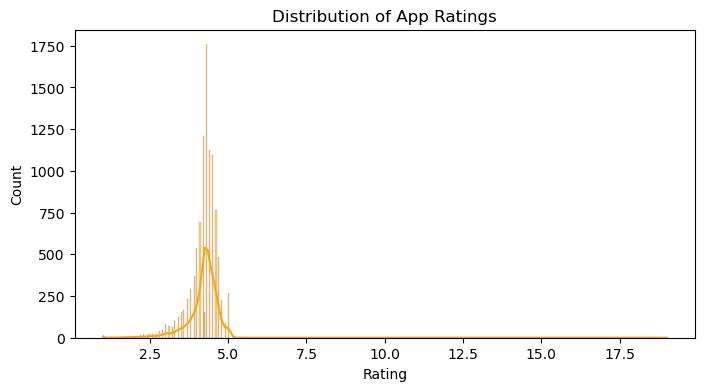

**Exercise 9: Group-Specific Imputation**
* Fill missing `Rating` values with the **Median Rating** of the specific `Category` the app belongs to.
* *Example:* If a "Business" app is missing a rating, fill it with the median rating of all "Business" apps.

In [ ]:
df['Rating'] = df.groupby('Category')['Rating']

#After this use transform Method

**Exercise 10: Drop Remaining NaNs**
* For the remaining columns with minimal missing data (like `Current Ver`), simply drop the rows containing NaNs to ensure a clean dataset for correlation.

In [ ]:
# dropna

### 5. Correlation & Visualization

**Exercise 11: Correlation Matrix**
* Generate a correlation matrix for the numerical columns (`Rating`, `Reviews`, `Size`, `Installs`, `Price`).

In [17]:

# Hint: numeric_only Use CORR





,Rating,Size,Installs,Price
Rating,1.000000,0.065161,0.048168,-0.019242
Size,0.065161,1.000000,0.168805,-0.023818
Installs,0.048168,0.168805,1.000000,-0.010290
Price,-0.019242,-0.023818,-0.010290,1.000000


**Exercise 12: Heatmap Visualization**
* Visualize the correlation matrix using a Seaborn Heatmap.
* Annotate the values.

In [1]:
# Hint: sns.heatmap



**Exercise 13: Scatter Plot Analysis**
* Create a Scatter Plot to analyze the relationship between `Reviews` and `Installs`.
* **Note:** You might need to use a log scale for the axes if the data is skewed.

In [23]:
# If needed
#plt.xscale('log')
#plt.yscale('log')
#plt.title('Reviews vs Installs (Log Scale)')
#plt.show()

**Exercise 14: Categorical Aggregation**
* Create a Bar Plot showing the top 10 Categories by **Total Installs**.

In [ ]:

top_cats = df.groupby('Category')['Installs']


### 6. Building a Sklearn Pipeline

**Exercise 15: Preprocessing Pipeline**
* Imagine you want to predict the `Rating` (Target).
* Create a Scikit-Learn `ColumnTransformer` that:
    1.  StandardScales the numerical features (`Reviews`, `Size`, `Installs`, `Price`).
    2.  OneHotEncodes the categorical feature (`Category`, `Content Rating`).
* Display the pipeline object.

# Without Pipline

In [46]:
from sklearn.preprocessing import StandardScaler

# Use

--- Numeric Scaling Results ---
  Reviews  Reviews_Scaled
0     159       -0.146291
1     967       -0.145787
2   87510       -0.091790
3  215644       -0.011842
4     967       -0.145787


,Cat_1.9,Cat_ART_AND_DESIGN,Cat_AUTO_AND_VEHICLES,Cat_BEAUTY,Cat_BOOKS_AND_REFERENCE,Cat_BUSINESS,Cat_COMICS,Cat_COMMUNICATION,Cat_DATING,Cat_EDUCATION,...,Cat_PERSONALIZATION,Cat_PHOTOGRAPHY,Cat_PRODUCTIVITY,Cat_SHOPPING,Cat_SOCIAL,Cat_SPORTS,Cat_TOOLS,Cat_TRAVEL_AND_LOCAL,Cat_VIDEO_PLAYERS,Cat_WEATHER
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# With Pipline(Optional part)

In [31]:

# Hint: from sklearn.compose import ColumnTransformer
# Hint: from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Hint: from sklearn.pipeline import Pipeline


